# Lab 1 - Introduction to Discrete Time Signals and Systems

Instructor: Prof. Lillian Jane Ratliff

Teaching Assistants: Ashwin Srinivas Badrinath and Kevin Lin

Team Members: Peter Michael

In [82]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt
import scipy.signal
from scipy.ndimage.interpolation import shift
from scipy import *
import copy
import pylab as pl
from scipy import signal
import time as t
from IPython import display


# 1) Implementing Discrete Time Filters to Filter Time-Series Data

In this part, we will be looking at various discrete time filters and how they are used to make more sense of time-series data. These are very common, basic and helpful operations that one encounters in anything related to signal processing.

## Implementing a Mean Filter

The time window size used was  3.0 ms
Signal 1


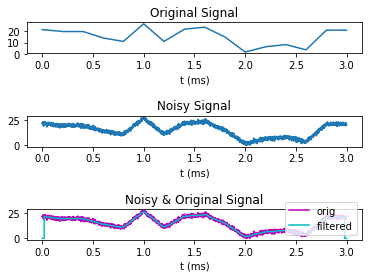

Signal 2


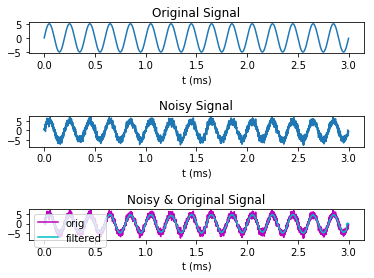

In [83]:
# choose relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,3,1/srate) # associated time vector that corresponds to 3 seconds
n     = len(time) # length of the time vector
p     = 15 # poles for random interpolation
pi = np.pi # value of pi

# here are some base signals to work with
base1 = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
base2 = 5*np.sin(2*pi*5*time)

# create some random noise to be added to the abve base signals
k=20
noise = np.random.randn(len(base1))
    
# add noise to the base signals to create new noisy signals
signal1 = base1 + noise
signal2 = base2 + noise

# implement the running mean filter

filtsig1 = np.zeros(n) # initialize filtered signal vector for signal 1
filtsig2 = np.zeros(n) # initialize filtered signal vector for signal 2

#TO DO: finish your implementation of the running mean filter
for n in range(k, len(base1) - k):
    filtsig1[n] = np.mean(signal1[n-k:n+k]) 
    filtsig2[n] = np.mean(signal2[n-k:n+k])

# compute the time window size in ms and print it
windowsize = len(filtsig1)/srate
# slides across the signal in ms
print("The time window size used was ",windowsize,"ms")

# TO DO: plot the required plots
fig1 = plt.figure(1)
plt.subplots_adjust(wspace=0.5,hspace=2)
# For base signal 1:
# In a single plot and three subplots, plot the original signal, noisy signal and 
# filtered signal overliad on the noisy signal to see the difference
print('Signal 1')
plt.subplot(3,1,1)
plt.title('Original Signal')
plt.xlabel('t (ms)')
plt.plot(time,base1)

plt.subplot(3,1,2)
plt.title('Noisy Signal')
plt.xlabel('t (ms)')
plt.plot(time,signal1)

plt.subplot(3,1,3)
plt.title('Noisy & Original Signal')
plt.xlabel('t (ms)')
plt.plot(time,signal1, 'm', label='orig')
plt.plot(time,filtsig1, 'c', label='filtered')
plt.legend(loc='best')
plt.show()

# For base signal 2:
# In a single plot and three subplots, plot the original signal, noisy signal and 
# filtered signal overliad on the noisy signal to see the difference
print('Signal 2')
fig2 = plt.figure(2)
plt.subplots_adjust(wspace=0.5,hspace=2)
plt.subplot(3,1,1)
plt.title('Original Signal')
plt.xlabel('t (ms)')
plt.plot(time,base2)

plt.subplot(3,1,2)
plt.title('Noisy Signal')
plt.xlabel('t (ms)')
plt.plot(time,signal2)

plt.subplot(3,1,3)
plt.title('Noisy & Original Signal')
plt.xlabel('t (ms)')
plt.plot(time,signal2, 'm', label='orig')
plt.plot(time,filtsig2, 'c', label='filtered')
plt.legend(loc='best')
plt.show()

### Discussion

## Implementing a Median Filter to Remove Spikes

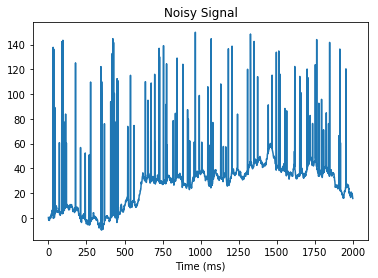

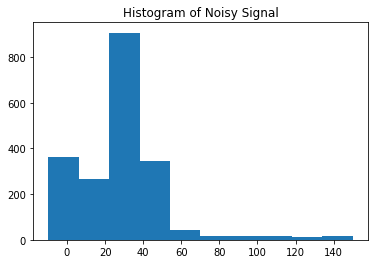

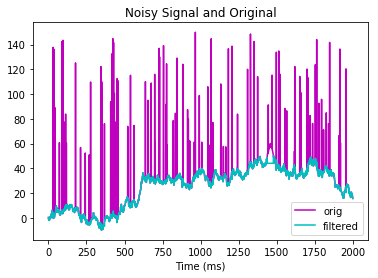

In [84]:
# create signal
n = 2000
signal = np.cumsum(np.random.randn(n))
samples = np.arange(0, n)

# proportion of time points to replace with noise
propnoise = .05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0:int(n*propnoise)]

# generate signal and replace points with noise
signal[noisepnts] = 50+np.random.rand(len(noisepnts))*100

fig3=plt.figure(3)
plt.title('Noisy Signal')
plt.xlabel('Time (ms)')
plt.plot(range(0,n),signal)

# use hist to pick threshold
fig4=plt.figure(4)
plt.title('Histogram of Noisy Signal')
plt.hist(signal)

# visual-picked threshold
threshold = 50


# find data values above the threshold
suprathresh = np.where(signal > threshold)
# initialize filtered signal
filtsig = copy.deepcopy(signal)

# loop through suprathreshold points and set to median of k
k = 20 # actual window is k*2+1
for n in suprathresh[0]:
    if(n-k >= 0):
        filtsig[n] = np.median(filtsig[n-k:n])
    elif (n+k < len(filtsig)):
        filtsig[n] = np.median(filtsig[n:n+k])

# TO DO: plot your results as directed
fig5=plt.figure(5)
plt.title('Noisy Signal and Original')
plt.plot(samples, signal, 'm', label='orig')
plt.plot(samples, filtsig, 'c', label='filtered')
plt.legend(loc='best')
plt.xlabel('Time (ms)')
plt.show()

### Discussion

## Denoising an EMG signal

Range of times:  -1000.0 1500.0
1281
1281


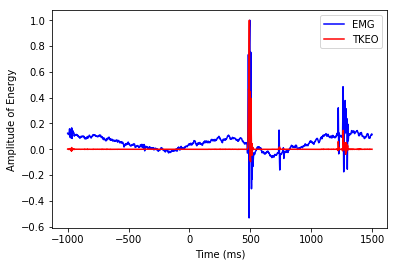

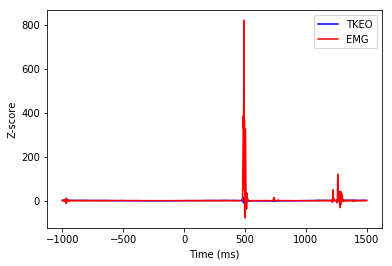

In [85]:
# import data
emgdata = scipy.io.loadmat('EMG.mat')

# extract needed variables
emgtime = emgdata['emgtime'][0]
emg  = emgdata['emg'][0]
print('Range of times: ', emgtime[0], emgtime[len(emgtime) - 1])
# initialize filtered signal
emgf = copy.deepcopy(emg) # this is where the result of 
# the TKEO algorithm should be stored
print(len(emgf))
print(len(emg))
# apply the TKEO algorithm
#emgf = np.multiply(emg,2) - np.multiply(shift(emg, -1), shift(emg, 1))

for k in range(0,len(emgf)-1):
    emgf[k]=emg[k]**2-emg[k+1]*emg[k-1]
    

# TO DO: You can implement this with a for loop or use a vectorized approach

## convert both signals to zscore



# find timepoint zero
#Returns the indices of the minimum values along an axis
#time0 = # TO DO: np.argmin() can come in handy
time0=np.argmin(abs(emgtime))
# Remove single-dimensional entries from the shape of an array.
#time0 = np.squeeze(np.where(emgtime == 0))


# convert original EMG to z-score from time-zero
#emgZ = # TO DO:subtract the mean of the emg signal from 0 to time0 from the original emg
# and divide that by the standard deviation of the signal from 0 to time0
#a2
emg_mean = np.mean(emg[0:time0])
#b1
emgf_stddev = np.std(emgf[0:time0])

#a2_new
emg_z = (emg-emg_mean)/(emg_stddev)

# same for filtered EMG energy
#emgZf = # TO DO: Repeat for the filtered signal
#a1
emgf_mean = np.mean(emgf[0:time0])

#a1_new
emgf_z = (emgf-emgf_mean)/(emgf_stddev)

# TO DO: plot your results as directed
fig6=plt.figure(6)
plt.plot(emgtime, emg/np.max(emg), 'b', label='EMG')
plt.plot(emgtime, emgf/np.max(emgf), 'r', label='TKEO')
plt.ylabel('Amplitude of Energy')
plt.xlabel('Time (ms)')
plt.legend(loc='best')
plt.show()

fig7=plt.figure(7)
plt.plot(emgtime, emg_z, 'b', label='TKEO')
plt.plot(emgtime, emgf_z, 'r', label='EMG')
plt.ylabel('Z-score')
plt.xlabel('Time (ms)')
plt.legend(loc='best')
plt.show()

### Discussion

# 2) Convolution

In this section you will be implementing your own convolution sum and plotting an animated plot that shows the process unfolding.

In [86]:
# define the basic signal generating functions
def u(t): # this returns a step signal
    return (t >= 0).astype(int)
    # TO DO: finish the step function without using any extra libraries
def r(t): # this return a ramp signal
    return t*(t>=0).astype(int)
    # TO DO: finish the ramp function without using any extra libraries

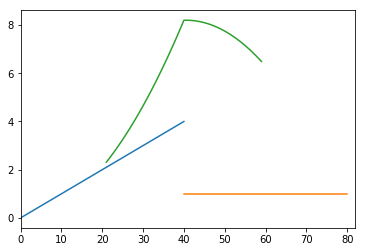

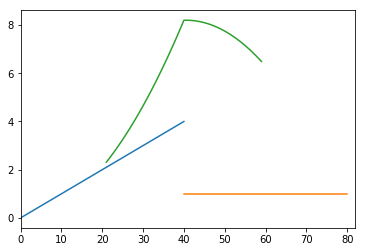

In [87]:
# TO DO: fill in the signal and kernel below as directed

# Use a 4s long ramp sampled at 10 samples/s for the signal
# Use a 4s long step signal for the kernel

#signal
fs=10
samples=np.arange(0,4+(1/2)/fs,1/fs)
# convolution kernel
signal1=r(samples)
kernel = u(samples)

# convolution sizes
nSign = len(signal1)
nKern = len(kernel)
nConv = nSign + nKern - 1

# 0<=k<=N-1
# 0<=n-k<=M-1
# 0<=n<=N+M-2
# N+M-2+1

## convolution in animation

half_kern = int( np.floor(nKern/2) )

# flipped version of kernel
kflip = kernel[::-1] #-np.mean(kernel)

# zero-padded data for convolution
#delay half_kern zeros
dat4conv = np.concatenate( (np.zeros(half_kern),signal1,np.zeros(half_kern)) ,axis=0)

# initialize convolution output
conv_res = np.zeros(nConv)


# run convolution
for ti in range(half_kern,nConv-half_kern):
    
    # get a chunk of data
    tempdata = dat4conv[ti-half_kern:ti+half_kern+1] 
    # TO DO: store the slice of th signal for the current time step
    
    # compute dot product (don't forget to flip the kernel backwards!)
    conv_res[ti] =np.sum(np.dot(tempdata,kflip))/fs # TO DO: store the rsult of the convolution sum here
    
    # draw plot
    pl.cla() # clear the axis
    plt.plot(signal1)
    plt.plot(np.arange(ti-half_kern,ti+half_kern+1),kflip)
    plt.plot(np.arange(half_kern+1,ti),conv_res[half_kern+1:ti])
    plt.xlim([0,nConv+1])
    
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    t.sleep(.01)
    

# cut off edges
conv_res = conv_res[half_kern:-half_kern]

### Discussion

# 3) Analog vs Digital Transmission

This section is meant to begin the Analog vs Digital comparison and get you thinking about why we bother with discrete signals. One reason is that signal processing and computation is all done on computers wich operate using digital circuitry and hence are discrete. Even otherwise, the nature of digital signals still makes them more advantageous to use in quite a lot of cases.




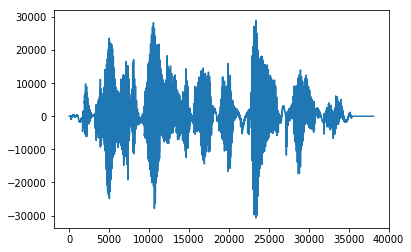

In [90]:
rate, s = wavfile.read('speech.wav')
plt.plot(s);
IPython.display.Audio(s, rate=rate)

In [93]:
# the analog signal is simply rescaled between -100 and +100
# largest element in magnitude:
norm = 1.0 / max(np.absolute([min(s), max(s)])) # the normalizing factor
sA = 100.0 * s * norm # the "analog" signal

# the digital version is clamped to the integers
sD = np.round(sA) # the "digital" signal

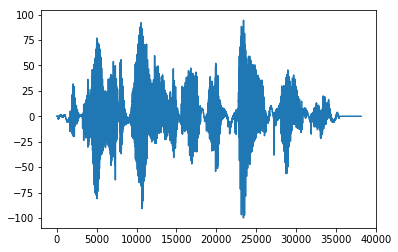

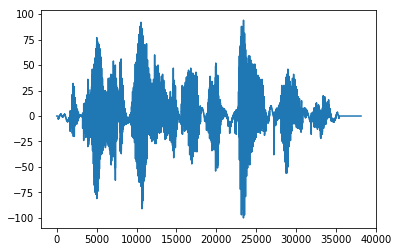

In [95]:
# TO DO: plot the difference between the analog and digital signal 
plt.plot(sA**2)
plt.show()


In [ ]:
# function to calculate SNR
def SNR(noisy, original):
    # power of the error
    err = # TO DO: use np.linalg.norm() to find the power of the noisy signal
    # power of the signal
    sig = # TO DO: use np.linalg.norm() to find the power of the original signal
    # SNR in dBs
    snr = # TO DO: return the log (base 10) of the ratio and aplify if by a factor of 10
    return snr 
       
# TO DO: print the snr of the signal a directed

In [ ]:
def repeater(x, noise_amplitude, attenuation):
    # first, create the noise
    noise = np.random.uniform(-noise_amplitude, noise_amplitude, len(x))
    # TO DO: fill in the steps as directed by the documentation:
    
    # attenuation
  
    # noise
   
    # gain compensation
    return ??

In [ ]:
def analog_tx(x, num_repeaters, noise_amplitude, attenuation):
# TO DO: modify x to represent analog transmission over the given number of repeaters
    return x

In [ ]:
def digital_tx(x, num_repeaters, noise_amplitude, attenuation):
# TO DO: modify x to represent digital transmission over the given number of repeaters
# hint: np.round() will come in handy when you're trying 
# to round your signals values to the nearest integer
    return x

In [ ]:
# keep these parameters
NUM_REPEATERS = 20
NOISE_AMPLITUDE = 0.2
ATTENUATION = 0.5

# TO DO: find the final signal that is recieved after transmission and store the 
# "analog" and "digital" versions in yA and yB respectively and print the SNR

yA =

yD = 

### Discussion